In [11]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import datasets
from sklearn import neighbors
import matplotlib.pyplot as plt

In [12]:
boston_dataset = sk.datasets.load_boston()
scaled_features = sk.preprocessing.scale(boston_dataset['data'])
label = sk.preprocessing.scale(boston_dataset['target'])

In [13]:
feature_names = boston_dataset['feature_names']
features = pd.DataFrame(scaled_features, columns=feature_names)
features.sample(5, random_state=42)

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
173 -0.409837 -0.487722 -1.034027 -0.272599 -0.386091  0.187151  0.552081   
274 -0.413949  1.229060 -0.689681  3.668398 -0.930305  0.674384 -1.268620   
491 -0.408212 -0.487722  2.422565 -0.272599  0.469104 -0.429726  1.074822   
72  -0.409853 -0.487722 -0.047680 -0.272599 -1.224009 -0.312904 -2.161190   
452  0.171842 -0.487722  1.015999 -0.272599  1.367490  0.017617  0.825898   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
173 -0.546077 -0.523001 -0.666608 -0.857929  0.425702 -0.506457  
274  0.134319 -0.637962 -0.916058 -0.395567  0.441052 -1.278814  
491 -0.916009 -0.637962  1.798194  0.760340  0.366604  0.759313  
72   0.709373 -0.637962 -0.613155  0.344213  0.375375 -0.999868  
452 -0.678277  1.661245  1.530926  0.806576  0.311563  0.647173

In [14]:
possible_p = np.linspace(1, 10, 200)
split_generator = sk.model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

In [15]:
def fit_cls_with_minkowski(features, label, p):
    clf = sk.neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=p)
    clf.fit(features, label)
    return clf

def cross_validation_mean_score(features, label, p):
    clf = fit_cls_with_minkowski(features, label, p)

    score_arr = sk.model_selection.cross_val_score(
        estimator=clf,
        X=features,
        y=label,
        cv=split_generator,
        scoring='neg_mean_squared_error'
    )
    score = score_arr.mean()
    return score


In [7]:
results = [cross_validation_mean_score(features, label, p) for p in possible_p]

In [8]:
def display_results(means, title):

    x_data = possible_p
    y_data = means

    plt.title(title)
    plt.plot(x_data, y_data)
    plt.xlabel('p')
    plt.ylabel('accuracy')
    plt.show()

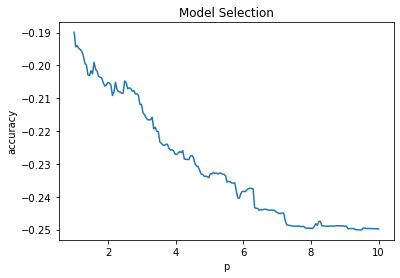

In [9]:
display_results(results, 'Model Selection')

In [16]:
df_results = pd.DataFrame(results, columns=['neg mean squared error'], index=possible_p)
df_results

neg mean squared error
1.000000                -0.189893
1.045226                -0.194361
1.090452                -0.193921
1.135678                -0.194809
1.180905                -0.195157
...                           ...
9.819095                -0.249720
9.864322                -0.249730
9.909548                -0.249740
9.954774                -0.249750
10.000000               -0.249820

[200 rows x 1 columns]